<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Check missing values in critical columns
print("Missing values in critical columns:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Strategy: Fill missing categorical values with the mode
for column in ['Employment', 'JobSat', 'RemoteWork']:
    df[column] = df[column].fillna(df[column].mode()[0])

# Verify missing values are handled
print("\nMissing values after imputation:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing values in critical columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after imputation:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median JobSat by Experience Range:
ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
dtype: float64


/tmp/ipykernel_1461/384689068.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_satisfaction_median = df.groupby('ExperienceRange')['JobSat'].value_counts(normalize=True).unstack().idxmax(axis=1)


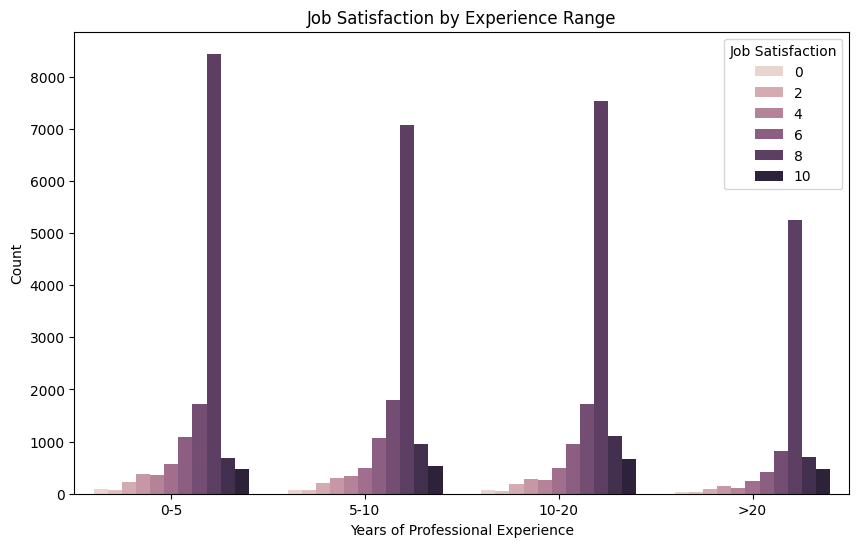

In [4]:
## Write your code here
# Convert YearsCodePro to numeric, handling non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each range (assuming JobSat is categorical, we'll use counts or convert if numeric)
print("Median JobSat by Experience Range:")
job_satisfaction_median = df.groupby('ExperienceRange')['JobSat'].value_counts(normalize=True).unstack().idxmax(axis=1)
print(job_satisfaction_median)

# Visualize with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ExperienceRange', hue='JobSat')
plt.title('Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


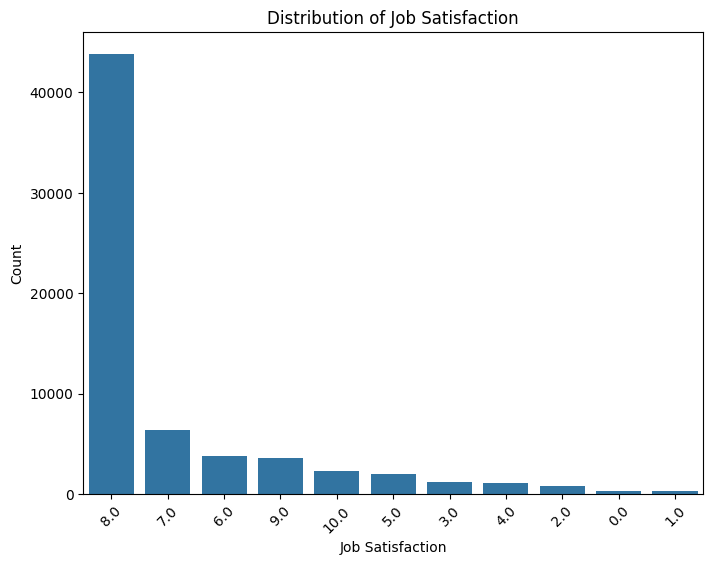

In [5]:
## Write your code here
# Count plot for JobSat distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


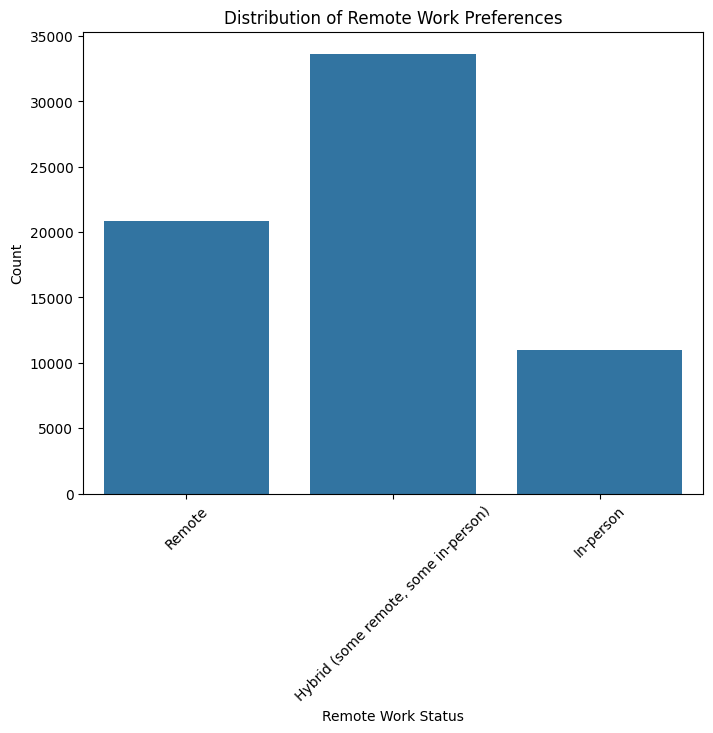


Remote Work Preferences by Employment Type (%):
 RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                            44.302144   
Employed, full-time;Employed, part-time                                        40.094340   
Employed, full-time;Independent contractor, fre...                             37.391060   
Employed, full-time;Independent contractor, fre...                             43.478261   
Employed, full-time;Independent contractor, fre...                              0.000000   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                             57.142857   
Student, full-time;Student, part-time;Retired                                 100.000000   
Student, part-time            

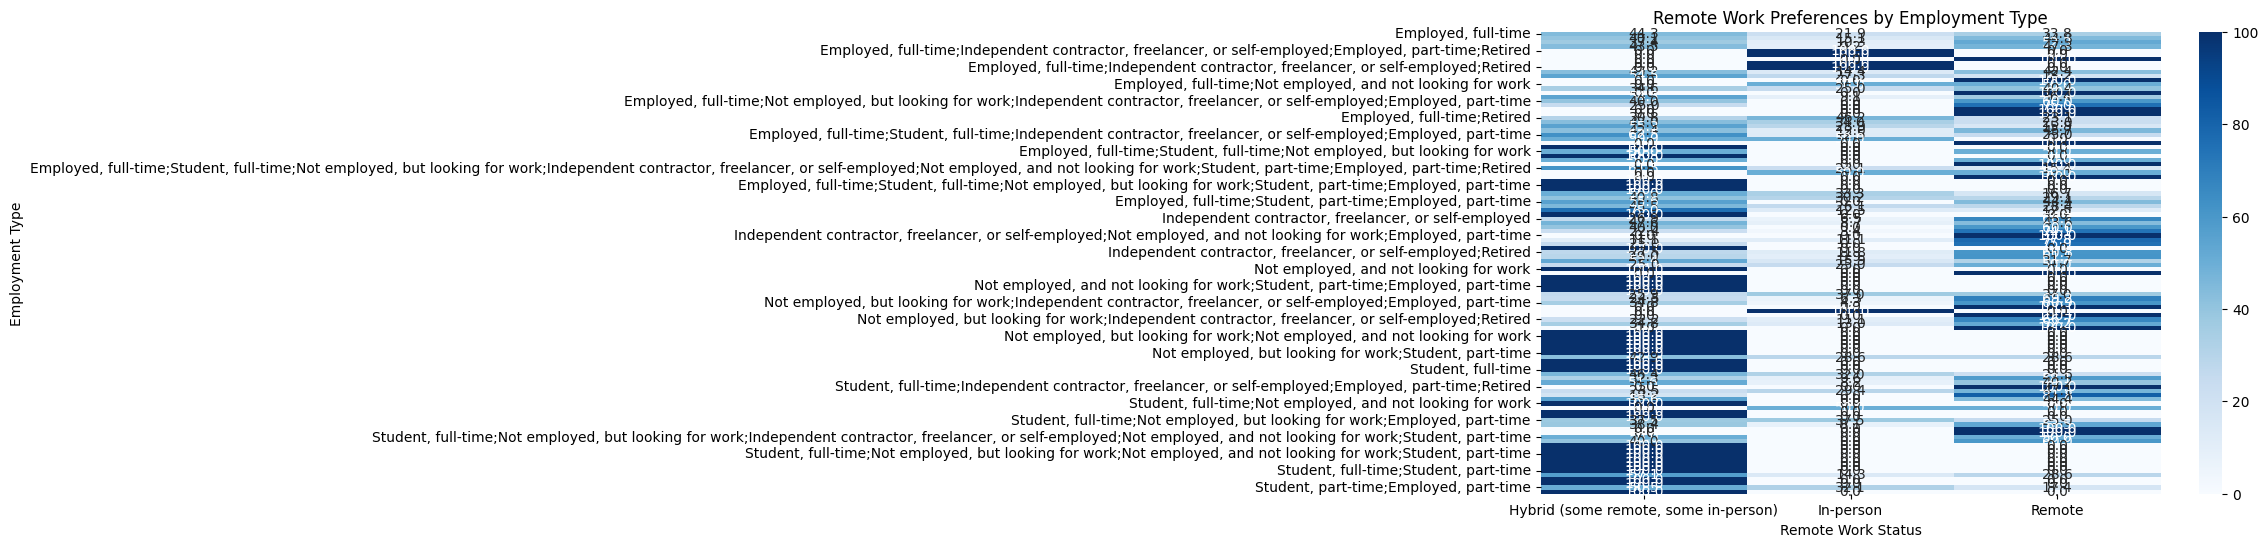

In [6]:
## Write your code here
# Count plot for RemoteWork distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Cross-tabulate RemoteWork by Employment
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print("\nRemote Work Preferences by Employment Type (%):\n", remote_by_employment)

# Visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(remote_by_employment, annot=True, cmap='Blues', fmt='.1f')
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Remote Work Status')
plt.ylabel('Employment Type')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


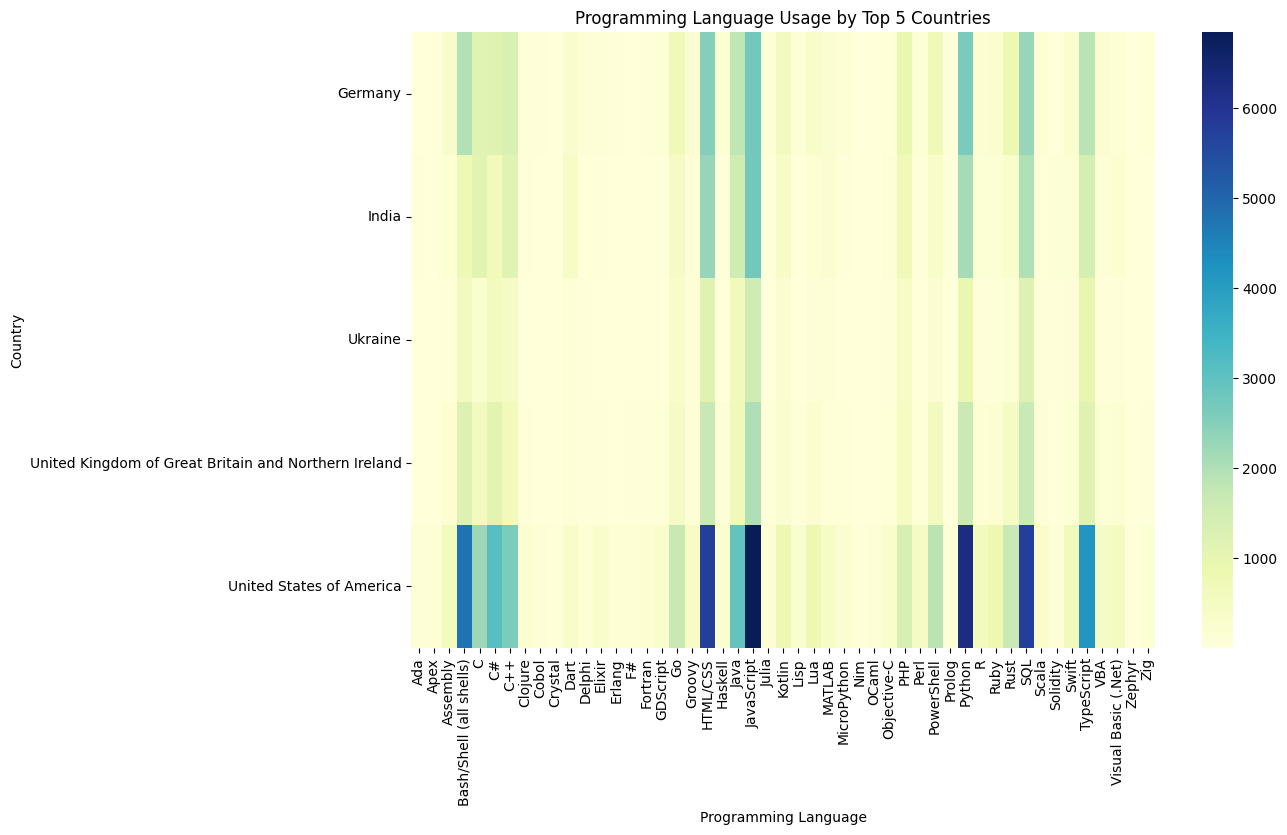


Top 5 Languages by Region:

United States of America:
 Language
JavaScript                 6849
Python                     6238
SQL                        5766
HTML/CSS                   5754
Bash/Shell (all shells)    4776
Name: United States of America, dtype: int64

Germany:
 Language
JavaScript                 2732
Python                     2640
HTML/CSS                   2514
SQL                        2297
Bash/Shell (all shells)    1970
Name: Germany, dtype: int64

India:
 Language
JavaScript    2730
HTML/CSS      2322
Python        2128
SQL           1986
Java          1549
Name: India, dtype: int64

United Kingdom of Great Britain and Northern Ireland:
 Language
JavaScript                 2011
HTML/CSS                   1707
SQL                        1663
Python                     1634
Bash/Shell (all shells)    1231
Name: United Kingdom of Great Britain and Northern Ireland, dtype: int64

Ukraine:
 Language
JavaScript    1532
SQL           1215
HTML/CSS      1198
TypeScri

In [7]:
## Write your code here
# Split LanguageHaveWorkedWith into individual languages
df_languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_languages.name = 'Language'
df_lang_region = df[['Country']].join(df_languages)

# Get top languages by region (e.g., top 5 countries)
top_countries = df['Country'].value_counts().head(5).index
df_top_regions = df_lang_region[df_lang_region['Country'].isin(top_countries)]

# Count languages by region
lang_by_region = df_top_regions.groupby(['Country', 'Language']).size().unstack(fill_value=0)

# Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(lang_by_region, cmap='YlGnBu', annot=False)
plt.title('Programming Language Usage by Top 5 Countries')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.show()

# Print top 5 languages per region
print("\nTop 5 Languages by Region:")
for country in top_countries:
    top_langs = lang_by_region.loc[country].nlargest(5)
    print(f"\n{country}:\n", top_langs)

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


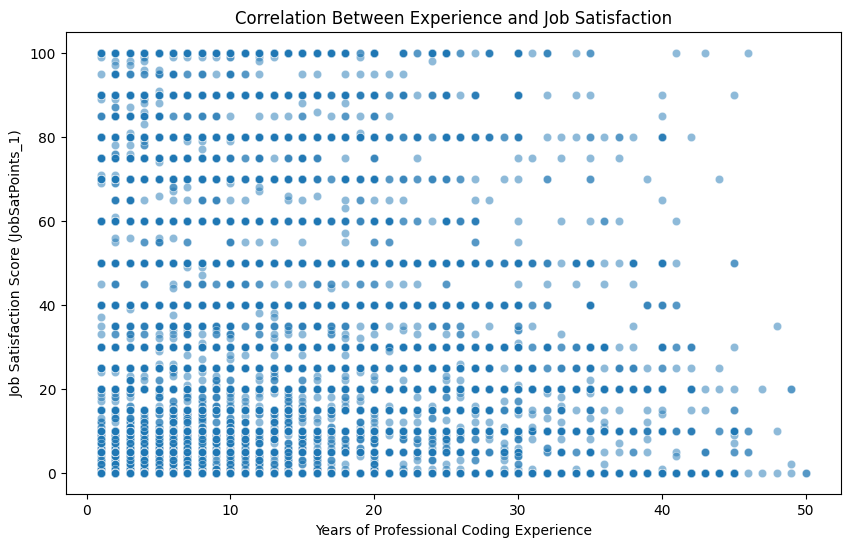

Correlation between YearsCodePro and JobSatPoints_1: -0.03


In [8]:
## Write your code here
# Assuming JobSatPoints_1 is a numeric satisfaction score; if not, adjust accordingly
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (JobSatPoints_1)')
plt.show()

# Calculate correlation
correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"Correlation between YearsCodePro and JobSatPoints_1: {correlation:.2f}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Educational Background vs Employment Type (%):
 Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                           59.063023   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                  67.380322   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)               70.778428   
Primary/elementary school                                     13.961606   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                69.797980   
Secondary school (e.g. American high school, Ge...            25.202831   
Some college/university study without earning a...            46.778199   
Something else                                                40.450644   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate d

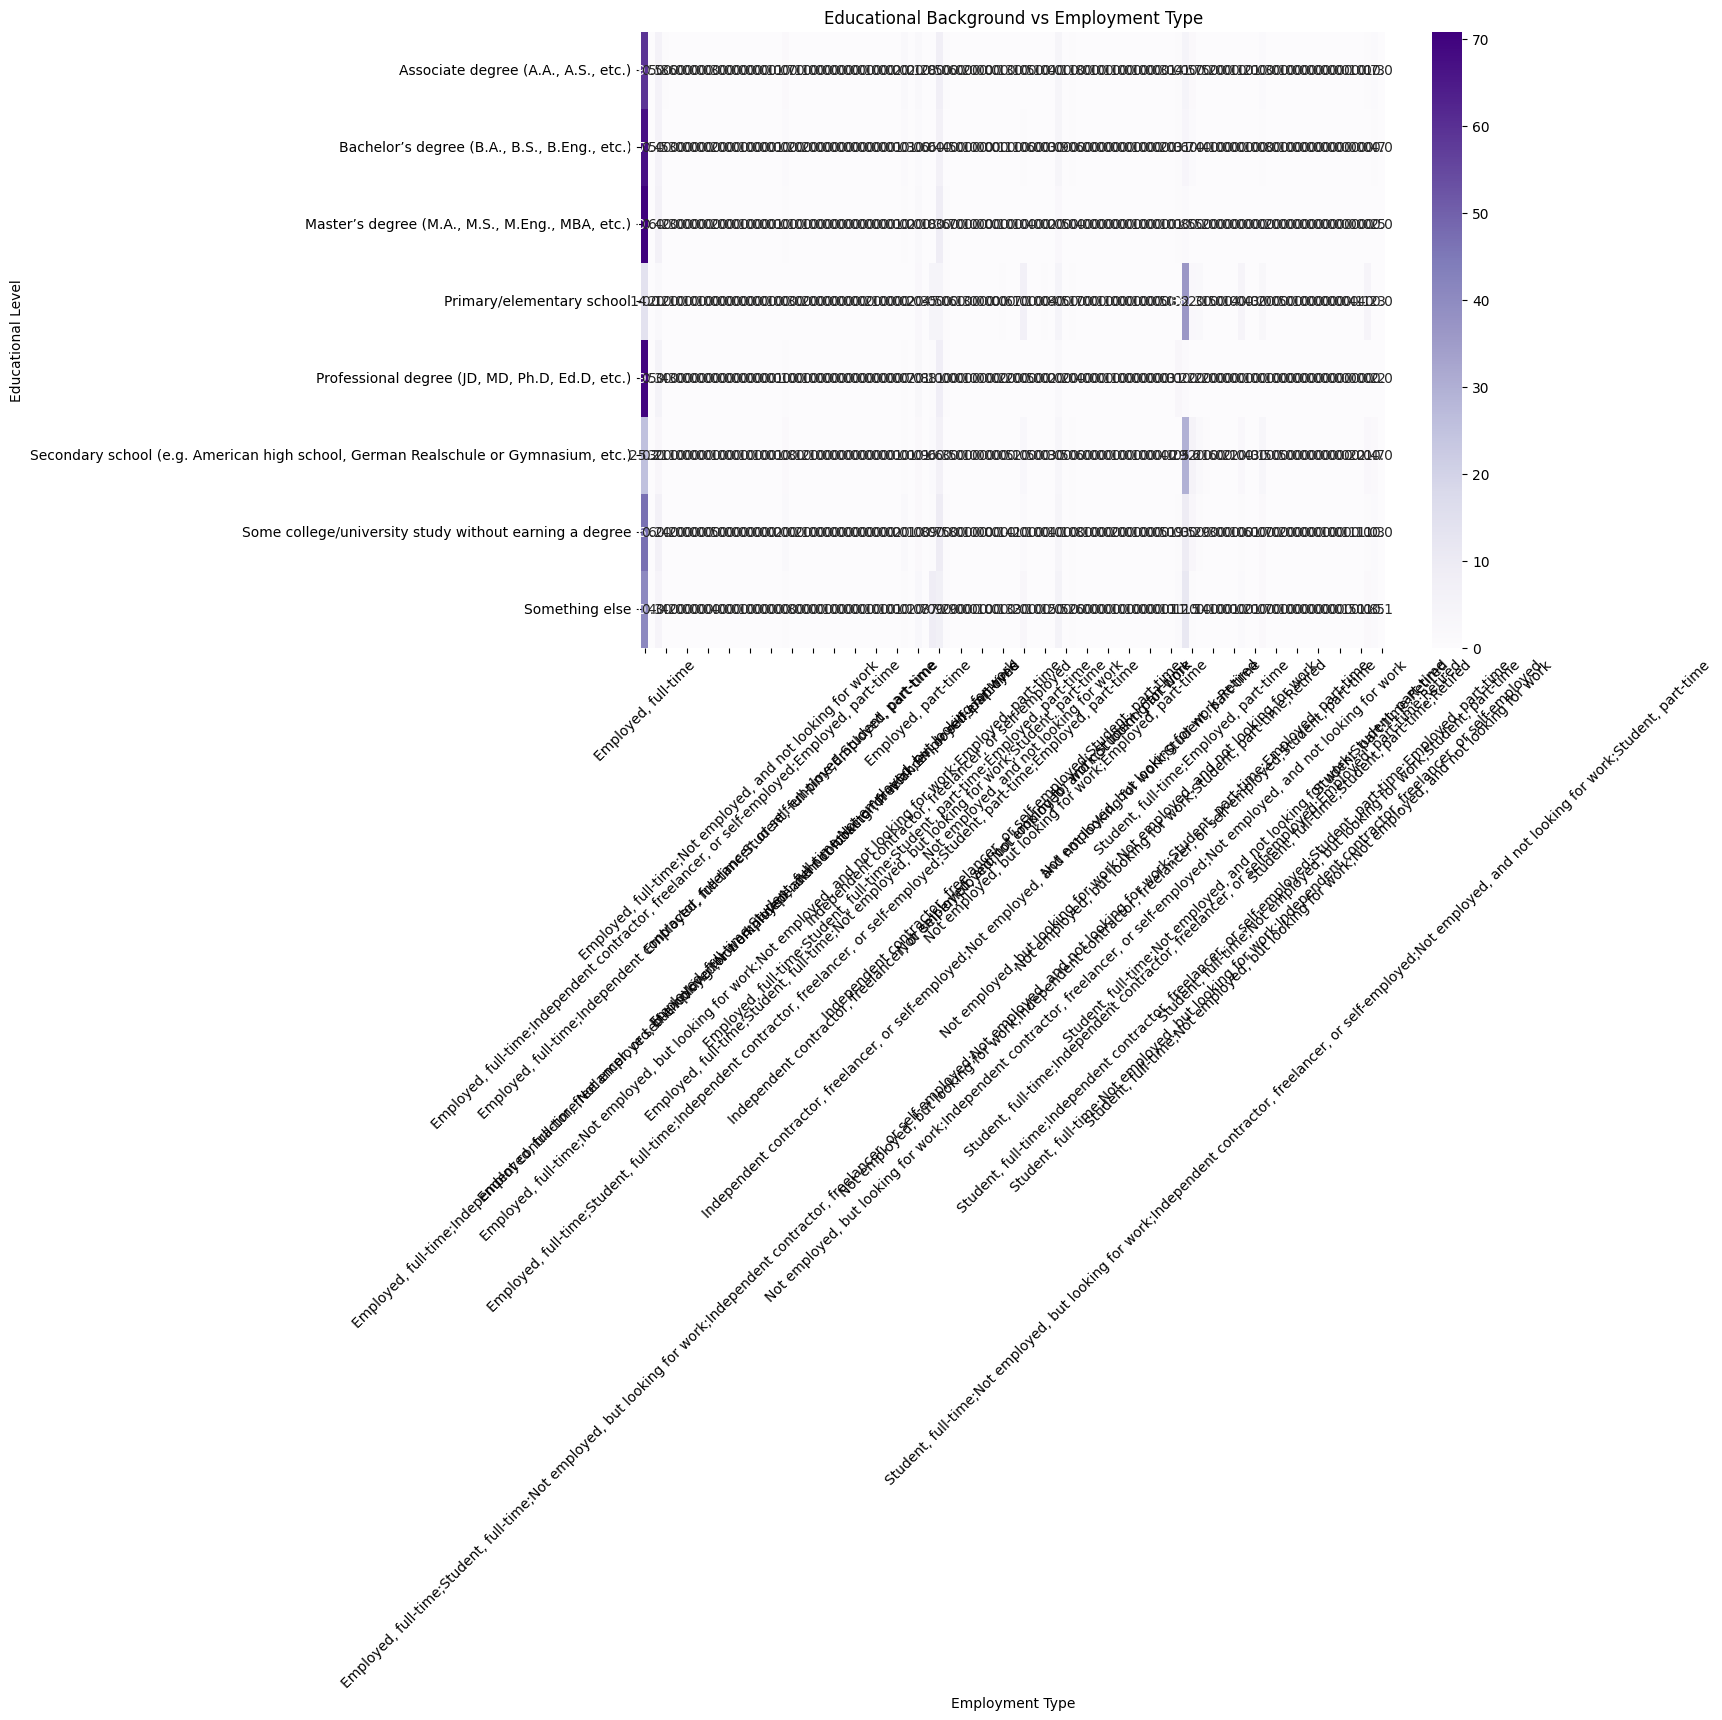

In [9]:
## Write your code here
# Cross-tabulate EdLevel and Employment
edu_emp_cross = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100
print("Educational Background vs Employment Type (%):\n", edu_emp_cross)

# Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(edu_emp_cross, annot=True, cmap='Purples', fmt='.1f')
plt.title('Educational Background vs Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.xticks(rotation=45)
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [10]:
## Write your code here
# Save the modified dataset to a CSV file
df.to_csv('survey_data_analyzed.csv', index=False)
print("Dataset saved as 'survey_data_analyzed.csv'")

Dataset saved as 'survey_data_analyzed.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
